In [1]:
      
####################  Plotting functions ####################
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import geopandas as gpd
import seaborn as sns  
import scipy.stats as sp   

df_p = pd.read_csv("/home/hubert/Desktop/Heuristics/RS/glorie-extract_flooding_events/data_in_use/flooding_dates.csv", parse_dates = ['date'])
df_n = pd.read_csv("/home/hubert/Desktop/Heuristics/RS/glorie-extract_flooding_events/data_in_use/n_values.csv", parse_dates = ['date'])
df_n.fillna(0)
p = df_p['p']
n = df_n['n']

# p = pd.read_csv("/home/hubert/Desktop/Heuristics/RS/glorie-extract_flooding_events/New-Data/2019/proportion_dagana_2019.csv")
# n = pd.read_csv("/home/hubert/Desktop/Heuristics/RS/glorie-extract_flooding_events/N-data/N_time_series_2019.csv")




<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
print(df_p.head())

   Unnamed: 0       ID                                           geometry  \
0           0  5509970  MULTIPOLYGON (((-15.916666666666686 16.25, -15...   
1           1  5509969  MULTIPOLYGON (((-16 16.25, -16 16.333333333333...   
2           2  5505644  MULTIPOLYGON (((-16.416666666666686 16.1666666...   
3           3  5505643  MULTIPOLYGON (((-16.5 16.166666666666686, -16....   
4           4  5527255  MULTIPOLYGON (((-15.5 16.583333333333314, -15....   

    Latitude  Longitude  aoi_area       date         p  year  
0  16.291667 -15.875000   1114.78 2019-01-13  0.000009  2019  
1  16.291667 -15.958333   6401.76 2019-01-13  0.000954  2019  
2  16.208333 -16.375000   6775.01 2019-01-13  0.000152  2019  
3  16.208333 -16.458333   1883.63 2019-01-13  0.000058  2019  
4  16.625000 -15.458333    223.70 2019-01-13  0.000000  2019  


In [3]:
print(df_p[df_p['year'] == 2019])

      Unnamed: 0       ID                                           geometry  \
0              0  5509970  MULTIPOLYGON (((-15.916666666666686 16.25, -15...   
1              1  5509969  MULTIPOLYGON (((-16 16.25, -16 16.333333333333...   
2              2  5505644  MULTIPOLYGON (((-16.416666666666686 16.1666666...   
3              3  5505643  MULTIPOLYGON (((-16.5 16.166666666666686, -16....   
4              4  5527255  MULTIPOLYGON (((-15.5 16.583333333333314, -15....   
...          ...      ...                                                ...   
1451        1451  5509968  MULTIPOLYGON (((-16.08333333333337 16.25, -16....   
1452        1452  5492683  MULTIPOLYGON (((-16.5 15.916666666666742, -16....   
1453        1453  5509967  MULTIPOLYGON (((-16.16666666666663 16.25, -16....   
1454        1454  5509966  MULTIPOLYGON (((-16.25 16.25, -16.25 16.333333...   
1455        1455  5509965  MULTIPOLYGON (((-16.333333333333314 16.25, -16...   

       Latitude  Longitude  aoi_area   

In [4]:
print(df_n[df_n['year'] == 2019])

      Unnamed: 0       ID                                           geometry  \
0              0  5509970  MULTIPOLYGON (((-15.916666666666686 16.25, -15...   
1              1  5509969  MULTIPOLYGON (((-16 16.25, -16 16.333333333333...   
2              2  5505644  MULTIPOLYGON (((-16.416666666666686 16.1666666...   
3              3  5505643  MULTIPOLYGON (((-16.5 16.166666666666686, -16....   
4              4  5527255  MULTIPOLYGON (((-15.5 16.583333333333314, -15....   
...          ...      ...                                                ...   
1451        1451  5509968  MULTIPOLYGON (((-16.08333333333337 16.25, -16....   
1452        1452  5492683  MULTIPOLYGON (((-16.5 15.916666666666742, -16....   
1453        1453  5509967  MULTIPOLYGON (((-16.16666666666663 16.25, -16....   
1454        1454  5509966  MULTIPOLYGON (((-16.25 16.25, -16.25 16.333333...   
1455        1455  5509965  MULTIPOLYGON (((-16.333333333333314 16.25, -16...   

       Latitude  Longitude  aoi_area   

In [5]:
p_2019 = df_p[df_p['year'] == 2019]['p']
n_2019 = df_n[df_n['year'] == 2019]['n']

p_2020 = df_p[df_p['year'] == 2020]['p']
n_2020 = df_n[df_n['year'] == 2020]['n']

p_2021 = df_p[df_p['year'] == 2021]['p']
n_2021 = df_n[df_n['year'] == 2021]['n']

p_2022 = df_p[df_p['year'] == 2022]['p']
n_2022 = df_n[df_n['year'] == 2022]['n']

In [6]:
print(p.shape)
print(n.shape)

(5304,)
(5304,)


In [7]:
p

0       0.000009
1       0.000954
2       0.000152
3       0.000058
4       0.000000
          ...   
5299    0.009768
5300    0.024693
5301    0.056737
5302    0.087983
5303    0.148539
Name: p, Length: 5304, dtype: float64

In [8]:
x_2019 = p_2019
y_2019 = n_2019

x_2020 = p_2020
y_2020 = n_2020

x_2021 = p_2021
y_2021 = n_2021

x_2022 = p_2022
y_2022 = n_2022

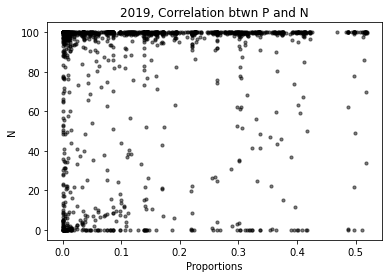

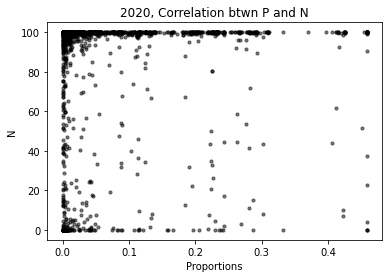

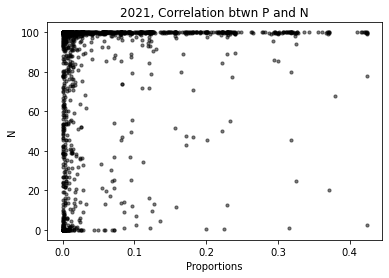

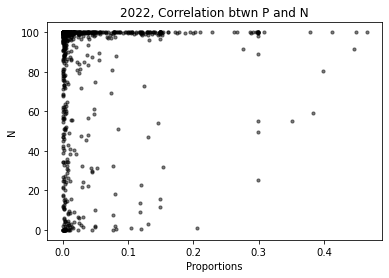

In [9]:
def plot_scatter (x,y, s=10, c = '0', xlabel = 'X', ylabel = 'Y', title=""):
    plt.scatter(x, y, s, color = c, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_scatter(x_2019, y_2019, xlabel = 'Proportions', ylabel = 'N', title = "2019, Correlation btwn P and N")
plot_scatter(x_2020, y_2020, xlabel = 'Proportions', ylabel = 'N', title = "2020, Correlation btwn P and N")
plot_scatter(x_2021, y_2021, xlabel = 'Proportions', ylabel = 'N', title = "2021, Correlation btwn P and N")
plot_scatter(x_2022, y_2022, xlabel = 'Proportions', ylabel = 'N', title = "2022, Correlation btwn P and N")


/home/hubert/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


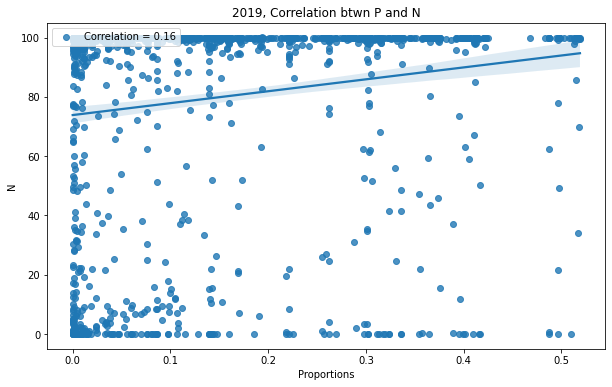

In [10]:
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x, y, label="Correlation = %0.2f" % round(np.corrcoef(x, y)[0][1], 2))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)
    plt.grid(0)
    plt.title(title)
    plt.show()
    
plot_scatter(x_2019, y_2019, xlabel = 'Proportions', ylabel = 'N', title = "2019, Correlation btwn P and N")

/home/hubert/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


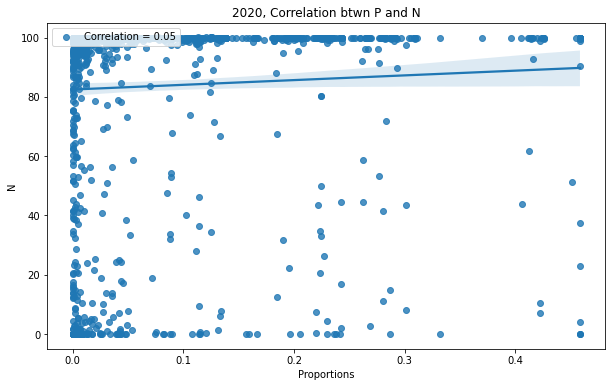

In [11]:
plot_scatter(x_2020, y_2020, xlabel = 'Proportions', ylabel = 'N', title = "2020, Correlation btwn P and N")

/home/hubert/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


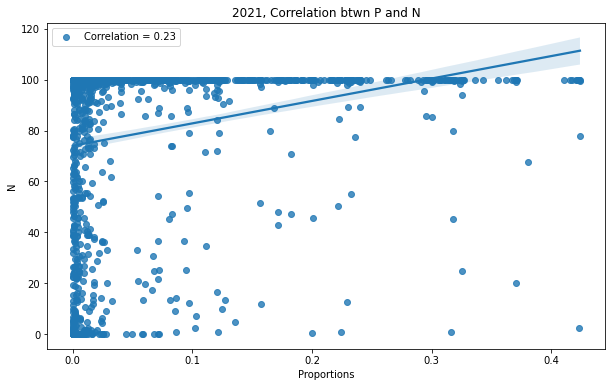

In [12]:
plot_scatter(x_2021, y_2021, xlabel = 'Proportions', ylabel = 'N', title = "2021, Correlation btwn P and N")


/home/hubert/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


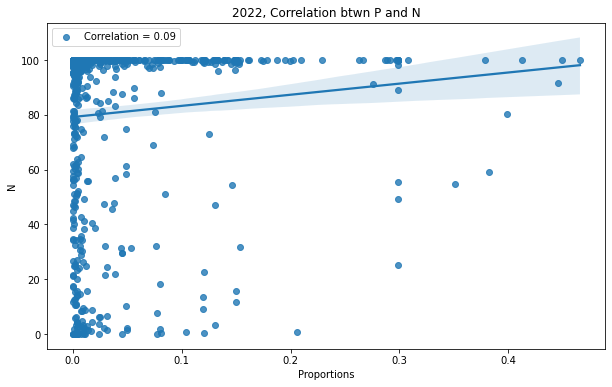

In [13]:
plot_scatter(x_2022, y_2022, xlabel = 'Proportions', ylabel = 'N', title = "2022, Correlation btwn P and N")